<a href="https://colab.research.google.com/github/dylanscoggins/CSCE4205Project/blob/dylan/Group0Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Imports

In [174]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import os
import re

# Mount Google Drive

In [175]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Helper Functions

In [176]:
# credit to https://www.kaggle.com/reddieeddie
def get_row(df, col, name):
  return df[df[col]==name]

In [177]:
# assigns an index label to for each Pokémon type
# i'm sure there's a much more elegant solution for this, but it works

index = []

for i in pokeTypes:
  if i == 'Bug':
    index.append(0)
  elif i == 'Dark':
    index.append(1)
  elif i == 'Dragon':
    index.append(2)
  elif i == 'Electric':
    index.append(3)
  elif i == 'Fairy':
    index.append(4)
  elif i == 'Fighting':
    index.append(5)
  elif i == 'Fire':
    index.append(6)
  elif i == 'Flying':
    index.append(7)
  elif i == 'Ghost':
    index.append(8)
  elif i == 'Grass':
    index.append(9)
  elif i == 'Ground':
    index.append(10)
  elif i == 'Ice':
    index.append(11)
  elif i == 'Normal':
    index.append(12)
  elif i == 'Poison':
    index.append(13)
  elif i == 'Psychic':
    index.append(14)
  elif i == 'Rock':
    index.append(15)
  elif i == 'Steel':
    index.append(16)
  else:
    index.append(17)

# Import Data Sets

In [178]:
# download .csv data sets from GitHub repository
# link to repo: https://github.com/dylanscoggins/CSCE4205Project
pokemonDataSet01 = 'https://raw.githubusercontent.com/dylanscoggins/CSCE4205Project/main/PokemonDataSet01.csv'
ds1 = pd.read_csv(pokemonDataSet01)

pokemonDataSet02 = 'https://raw.githubusercontent.com/dylanscoggins/CSCE4205Project/main/PokemonDataSet02.csv'
ds2 = pd.read_csv(pokemonDataSet02)

# associate images with Pokémon in ds2
# credit to https://www.kaggle.com/reddieeddie for the framework to set up Pokédex
pokedex = '/content/gdrive/MyDrive/CSCE 4205/Project Data/Images/'
fileNames = os.listdir(pokedex)
pokeNames, pokeTypes = [], []
for path in os.listdir(pokedex):
  name = re.search(r"^([^.]*).*", path).group(1)
  pokeNames.append(name.capitalize())
  pokeTypes.append(ds2['Type1'][int(get_row(ds2, 'Name', name).index.values)])

numImgs = len(fileNames)
print("Pokédex contains", numImgs, "Pokémon")

col1 = fileNames  # Image File
col2 = pokeNames  # Pokémon Name
col3 = pokeTypes  # Pokémon Type
col4 = index      # Assigned Label: range(0,18)

pokemonDF = pd.DataFrame({'Image': col1, 'Pokémon': col2, 'Class': col3, 'Label': col4})
# pokemonData.sort_values(by=['Class'])
pokemonDF

Pokédex contains 809 Pokémon


,Image,Pokémon,Class,Label
0,azumarill.png,Azumarill,Water,17
1,azurill.png,Azurill,Normal,12
2,beedrill.png,Beedrill,Bug,0
3,barbaracle.png,Barbaracle,Rock,15
4,ampharos.png,Ampharos,Electric,3
...,...,...,...,...
804,zapdos.png,Zapdos,Electric,3
805,yveltal.png,Yveltal,Dark,1
806,zygarde-50.png,Zygarde-50,Dragon,2
807,zeraora.jpg,Zeraora,Electric,3


# Preprocess the DataFrame

In [185]:
# split dataframe into train/test sets
# random_state is used for reproducibility purposes
train, test = train_test_split(pokemonDF, test_size=0.2, random_state=42)

In [186]:
len(train)

647

In [187]:
len(test)

162

In [179]:
imgs = []
names = []
for i in range(len(pokeNames)):
  img = mpimg.imread(pokedex + pokemonDF['Image'][i])
  imgs.append(img)

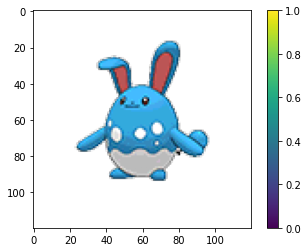

In [180]:
plt.figure()
plt.imshow(imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

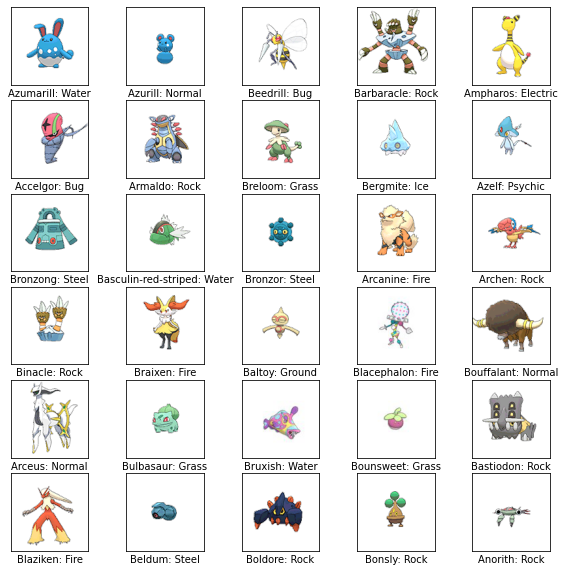

In [181]:
plt.figure(figsize=(10,10))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imgs[i], cmap=plt.cm.binary)
  plt.xlabel(pokeNames[i] + ": " + pokeTypes[i])
plt.show()

# Building the NN Model

In [188]:
# builds the NN layers
# input_shape: image sizes (120x120 pixels)
# 1st Dense layer:
# 2nd Dense layer: 18 refers to the unique Pokémon Primary Types
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(120,120)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(18)
])

# Compilation

In [189]:
# model needs to be compiled before it can handle the test/train sets
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])